In [77]:
import pandas as pd
import numpy as np

In [78]:
#df=pd.read_csv("insert to database.csv")
df=pd.read_csv("test.csv")
#df=pd.read_csv('item2.csv')
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
df.head()


,date,sales
0,2017-01-01,330
1,2017-01-02,190
2,2017-01-03,200
3,2017-01-04,180
4,2017-01-05,200


In [79]:
df.rename(columns={'date':'send_date','sales':'quantity'}, inplace=True)


df.head()

,send_date,quantity
0,2017-01-01,330
1,2017-01-02,190
2,2017-01-03,200
3,2017-01-04,180
4,2017-01-05,200


In [80]:

ven=['ven1','V180101001','ven2','V190526001']
df['send_date']=df['send_date']+ pd.DateOffset(years=2)
df['received_date']=df['send_date']+ pd.DateOffset(np.random.randint(10))


In [81]:
df['Stock_id']='sk16'
df['Vendor_id']=np.random.choice(list(ven), len(df))

df.dtypes

send_date        datetime64[ns]
quantity                  int64
received_date    datetime64[ns]
Stock_id                 object
Vendor_id                object
dtype: object

In [82]:
df=df[['Stock_id','Vendor_id','quantity','send_date','received_date']]
df.set_index('Stock_id')
df.head()

,Stock_id,Vendor_id,quantity,send_date,received_date
0,sk16,V190526001,330,2019-01-01,2019-01-10
1,sk16,ven1,190,2019-01-02,2019-01-11
2,sk16,V190526001,200,2019-01-03,2019-01-12
3,sk16,ven2,180,2019-01-04,2019-01-13
4,sk16,V190526001,200,2019-01-05,2019-01-14


In [83]:
import pyodbc
server = '(localdb)\MSSQLLocalDB'
database = 'SCMdb'
username = 'Guest'
password = 'Guest'
driver= '{ODBC Driver 17 for SQL Server}'


In [84]:
for index,row in df.iterrows():
    print(row[0])
    print(row[1])
    print(row[3])
    print(row[2])

    print(row[4])
    break

sk16
V190526001
2019-01-01 00:00:00
330
2019-01-10 00:00:00


In [85]:
cnxn = pyodbc.connect("Driver="+driver+";Server="+server+";Database="+database+";Uid="+username+";Pwd="+password+";TrustServerCertificate=no;Connection Timeout=30;")
cursor = cnxn.cursor()
for index,row in df.iterrows():
    try:
        cursor.execute("INSERT INTO dbo.vendor_order values (?,?,?,?,?,null)",row[0],row[1],row[3],row[2],row[4])
        cursor.execute("insert into vendor_store(vs_id,vendor_id,stock_id,send_date,init_quantity,cur_quantity,cost_price) values (concat('v',next value for seq_vendorstore),?,?,?,?,?,?)"
             ,row[1],row[0],row[3],row[2],row[2],12)
    except:
        continue

#cursor.execute(sql)


In [87]:
cursor.execute("select * from vendor_order where year(send_date)>2018 and stock_id='sk16'" )
data=cursor.fetchall()
data

[('sk16', 'V180101001', datetime.datetime(2019, 1, 6, 0, 0), 300, datetime.datetime(2019, 11, 27, 23, 44, 54, 517000), None),
 ('sk16', 'V180101001', datetime.datetime(2019, 1, 15, 0, 0), 230, datetime.datetime(2019, 11, 27, 23, 44, 54, 530000), None),
 ('sk16', 'V180101001', datetime.datetime(2019, 1, 27, 0, 0), 230, datetime.datetime(2019, 11, 27, 23, 44, 54, 547000), None),
 ('sk16', 'V180101001', datetime.datetime(2019, 1, 28, 0, 0), 180, datetime.datetime(2019, 11, 27, 23, 44, 54, 547000), None),
 ('sk16', 'V180101001', datetime.datetime(2019, 2, 3, 0, 0), 220, datetime.datetime(2019, 11, 27, 23, 44, 54, 553000), None),
 ('sk16', 'V180101001', datetime.datetime(2019, 2, 9, 0, 0), 310, datetime.datetime(2019, 11, 27, 23, 44, 54, 557000), None),
 ('sk16', 'V180101001', datetime.datetime(2019, 2, 12, 0, 0), 320, datetime.datetime(2019, 11, 27, 23, 44, 54, 557000), None),
 ('sk16', 'V180101001', datetime.datetime(2019, 2, 15, 0, 0), 250, datetime.datetime(2019, 11, 27, 23, 44, 54, 557

In [88]:
cnxn.commit()

In [89]:

cnxn.close()


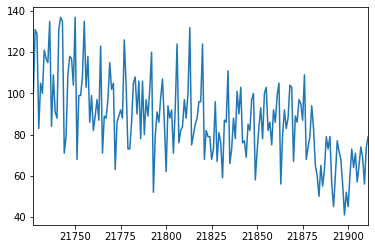

In [149]:
df['quantity'].plot()